In [7]:
# So lets import all important liabraries first 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [8]:
link ='https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv'
df = pd.read_csv(link)
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [9]:
df.shape

(158, 12)

In [10]:
df.keys()



Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [11]:
df.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

In [12]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

We dont have any Null values present in data set

In [13]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In Above chart we can see two objects are present so we need to process Encoding for them

In [14]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

list=['Country','Region']
for i in list:
    df[i]=le.fit_transform(df[i].astype(str))


df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


By Applying encoding technique I have coverted objest in numerical data. ML model only understand Numbers

In [15]:
df.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


In [16]:
df.corr()['Happiness Score'].sort_values()

Happiness Rank                  -0.992105
Standard Error                  -0.177254
Region                          -0.176791
Country                          0.083380
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

Happines rank has very strong negative correlation which will impact outcome badly so we will remove this before training model
We can also remove Standard error,region,Country considering they are having negative correlation and logically we should not predict outcome with these data

<AxesSubplot:>

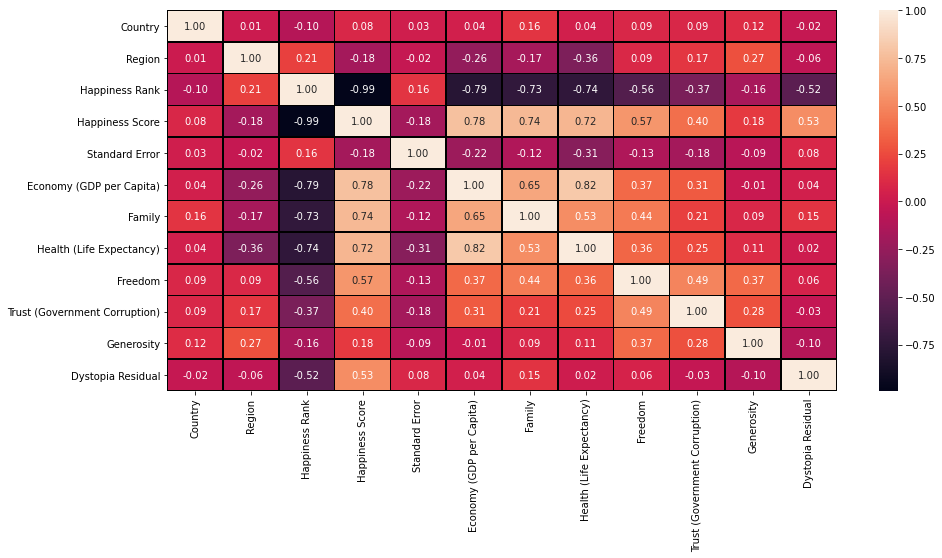

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.6,linecolor="black", fmt='.2f')

<AxesSubplot:xlabel='Country', ylabel='Happiness Score'>

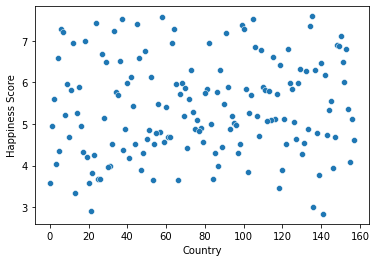

In [18]:
sns.scatterplot(x="Country",y="Happiness Score",data=df)

<AxesSubplot:xlabel='Happiness Rank', ylabel='Happiness Score'>

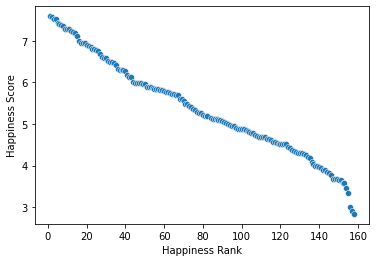

In [19]:
sns.scatterplot(x="Happiness Rank",y="Happiness Score",data=df)

Above is the example of negative correlation

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

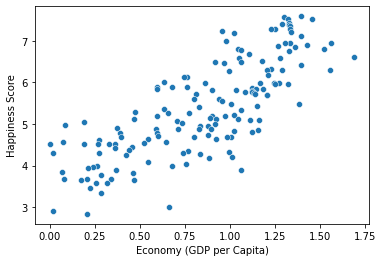

In [20]:
sns.scatterplot(x="Economy (GDP per Capita)",y="Happiness Score",data=df)    

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

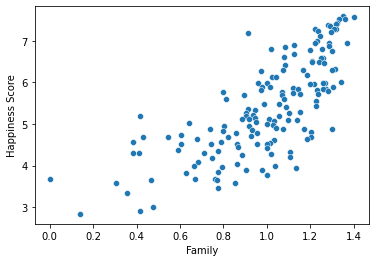

In [21]:
sns.scatterplot(x="Family",y="Happiness Score",data=df) 

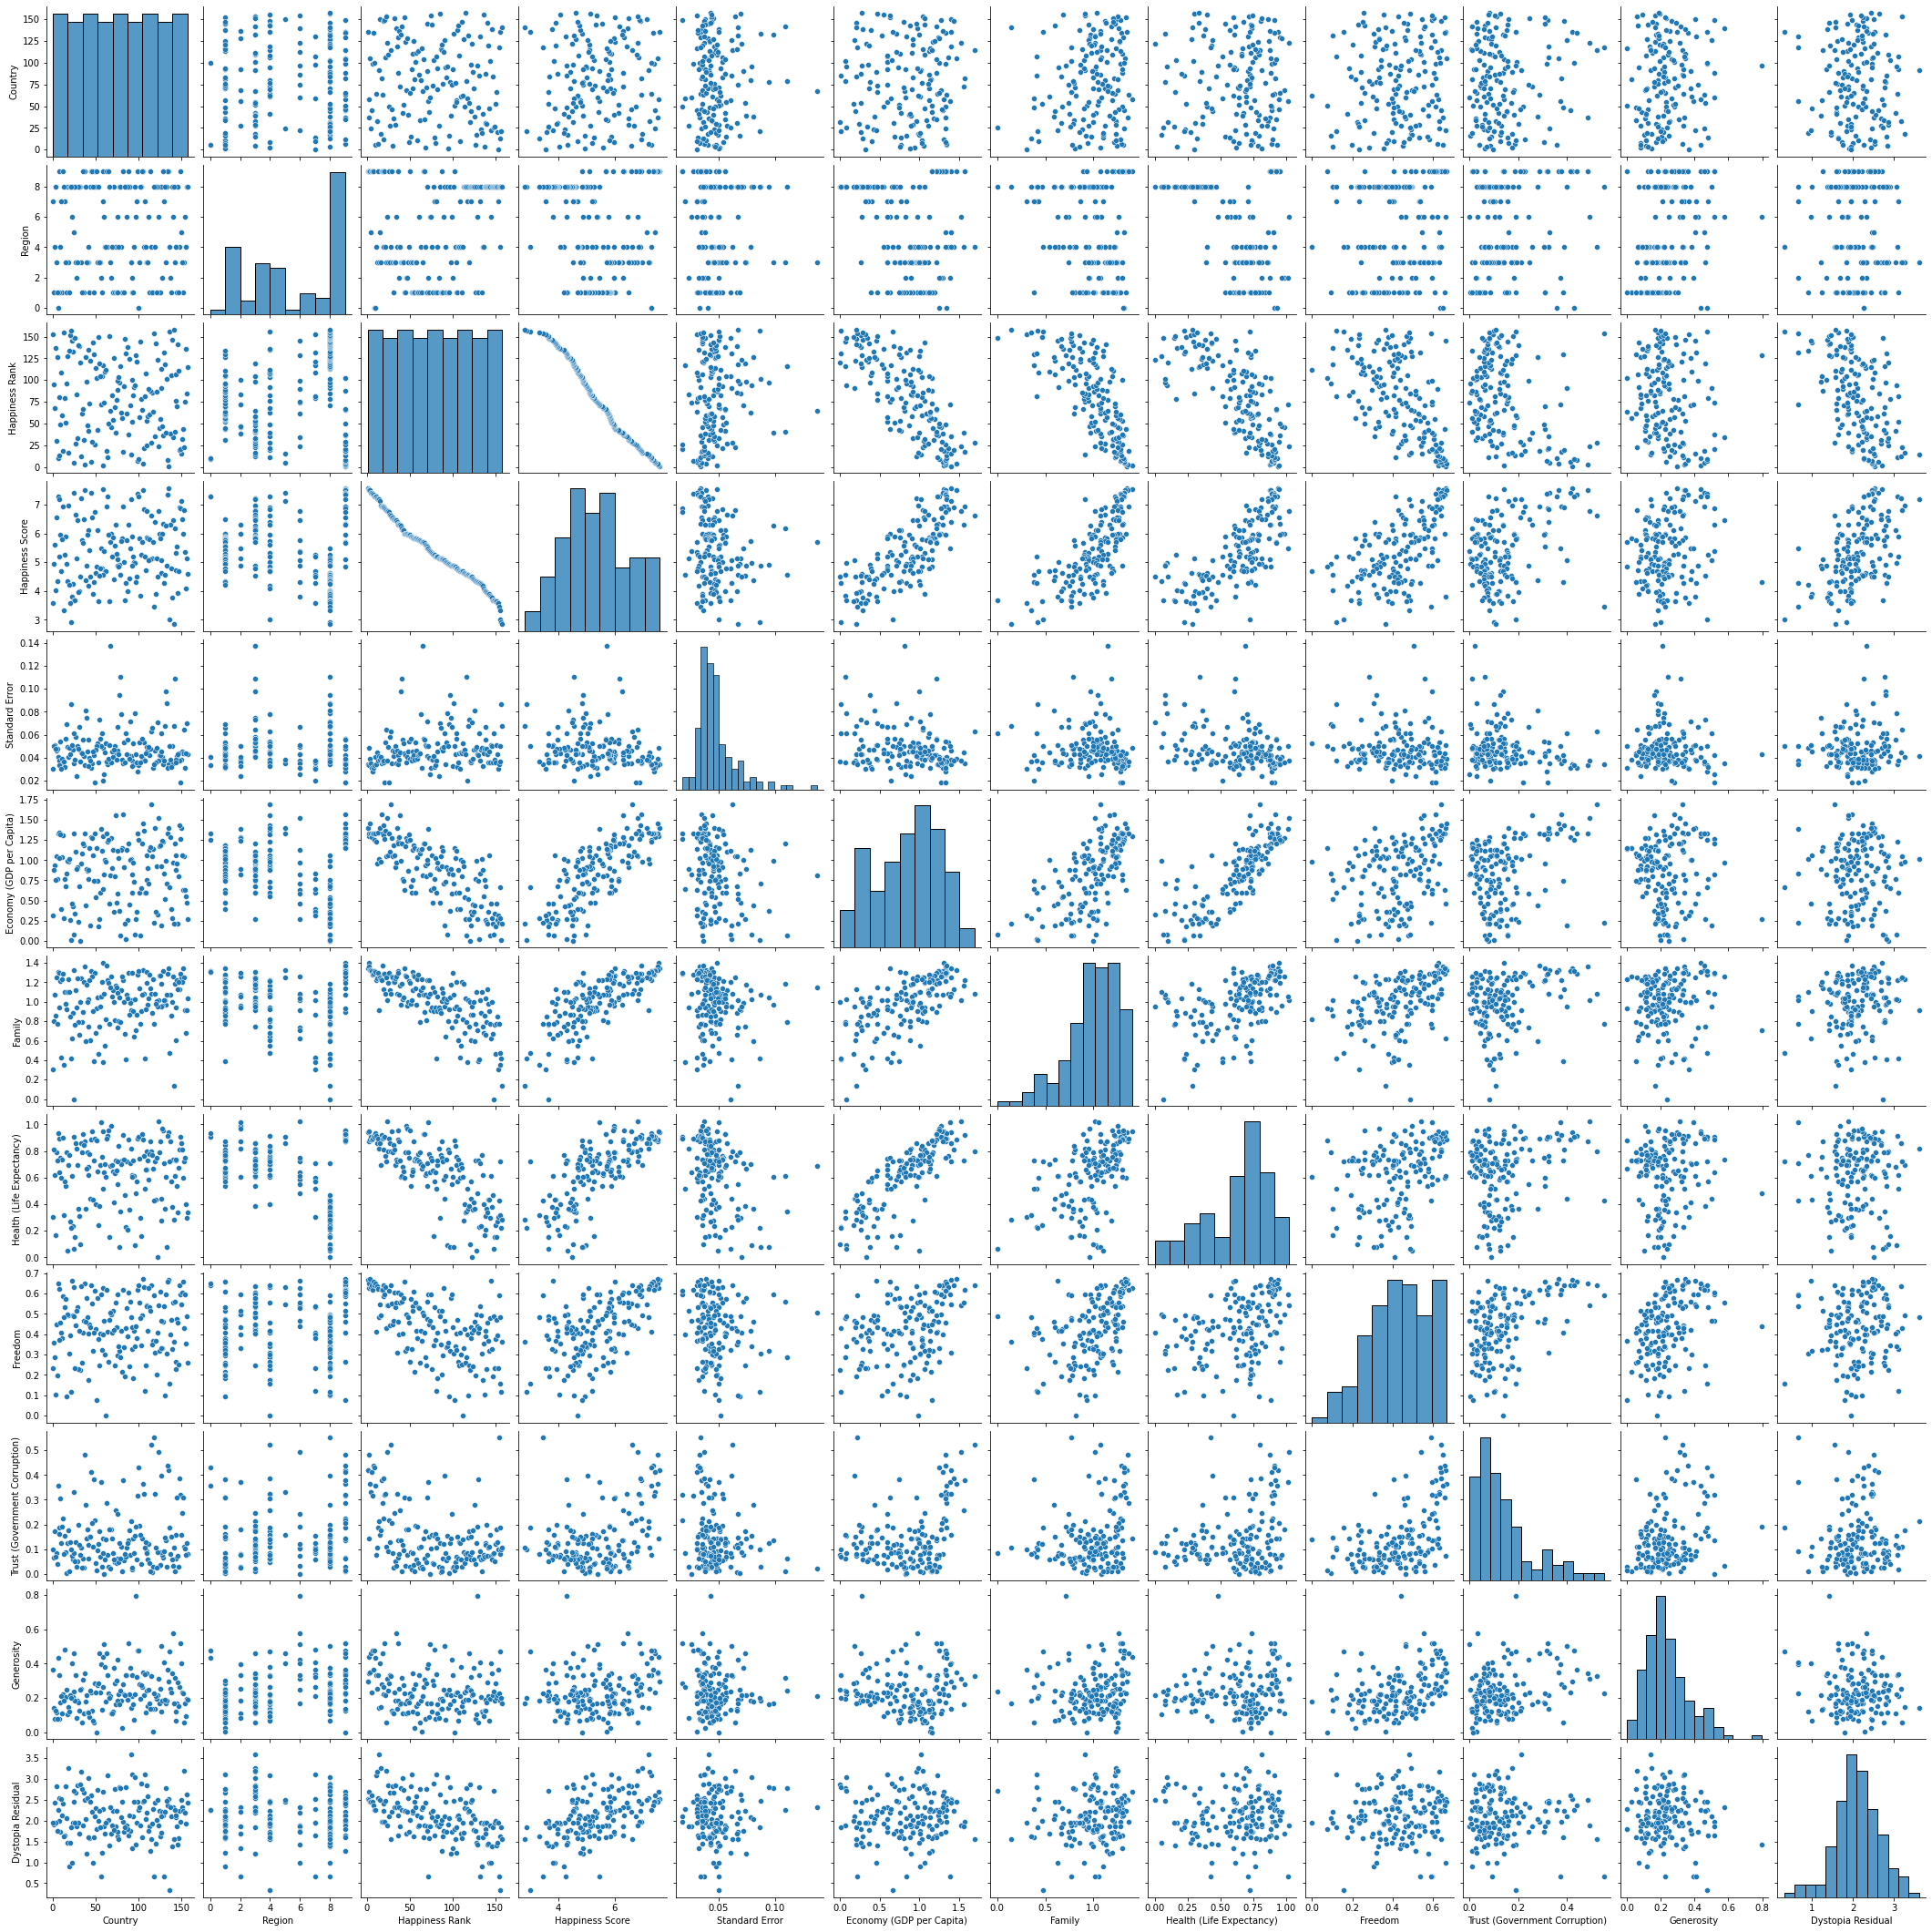

In [22]:
sns.pairplot(df)

Country                              AxesSubplot(0.125,0.71587;0.227941x0.16413)
Region                            AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Happiness Rank                    AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Happiness Score                     AxesSubplot(0.125,0.518913;0.227941x0.16413)
Standard Error                   AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Economy (GDP per Capita)         AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Family                              AxesSubplot(0.125,0.321957;0.227941x0.16413)
Health (Life Expectancy)         AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Freedom                          AxesSubplot(0.672059,0.321957;0.227941x0.16413)
Trust (Government Corruption)          AxesSubplot(0.125,0.125;0.227941x0.16413)
Generosity                          AxesSubplot(0.398529,0.125;0.227941x0.16413)
Dystopia Residual                   AxesSubplot(0.672059,0.125;0.227941x0.16413)
dtype: object

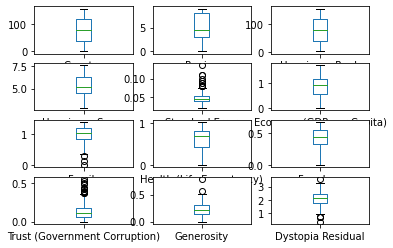

In [23]:
df.plot(kind='box',subplots=True, layout=(4,3))

<AxesSubplot:>

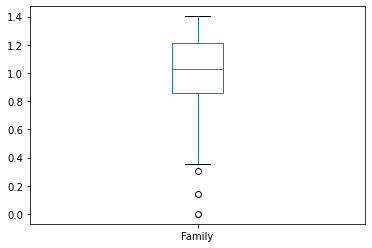

In [24]:
df['Family'].plot.box()

<AxesSubplot:>

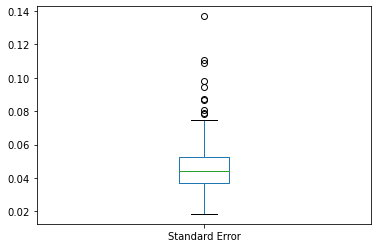

In [25]:
df['Standard Error'].plot.box()

<AxesSubplot:>

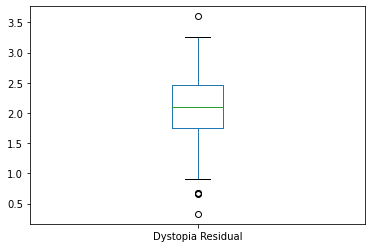

In [26]:
df['Dystopia Residual'].plot.box()

<AxesSubplot:>

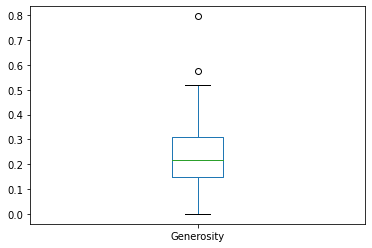

In [27]:

df['Generosity'].plot.box()

<AxesSubplot:>

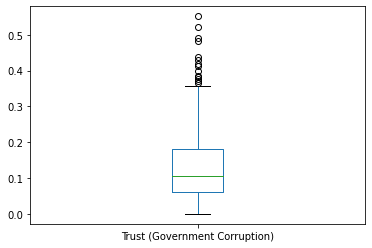

In [28]:
df['Trust (Government Corruption)'].plot.box()

I have plotted all variable separate wehere we have outliers present.

In [29]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

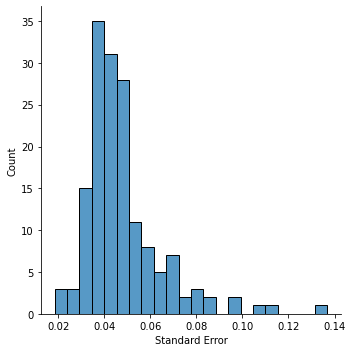

In [30]:
sns.displot(df["Standard Error"])

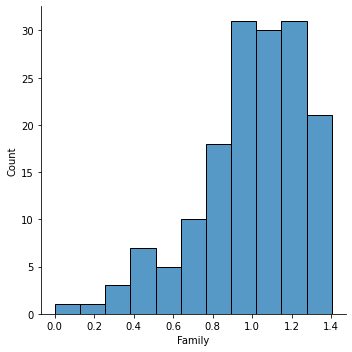

In [31]:
sns.displot(df["Family"])

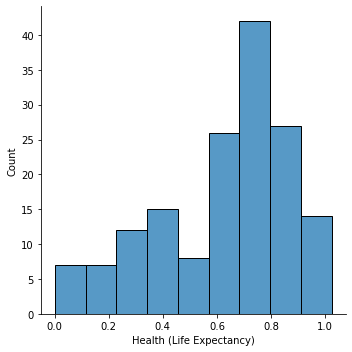

In [32]:
sns.displot(df["Health (Life Expectancy)"])

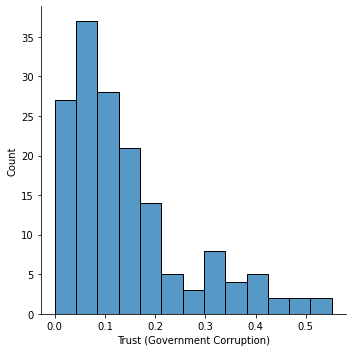

In [33]:
sns.displot(df["Trust (Government Corruption)"])

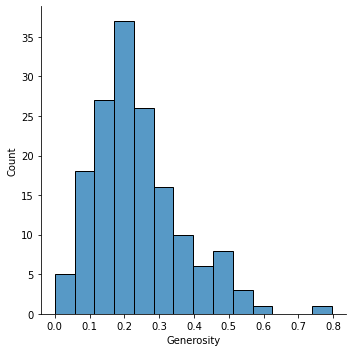

In [34]:
sns.displot(df["Generosity"])

# So from above all visualization and work I have collected below points to clean data.

  * I will remove column Country,Region,Happiness Rank,Standard Error As per my observation they are having very less impact or negative impact on target
  * we need to remove outliers
  * Skewness Need to remove

In [35]:
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [36]:
df=df.drop(["Country","Region","Happiness Rank","Standard Error"],axis=1)
df

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [37]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(158, 8)

In [38]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(158, 8)
(152, 8)


In [39]:
loss_percentage=(158-152)/158*100
print(loss_percentage)

3.79746835443038


So we removed Outliers and calculated data loss percentage which is near by 4 % which is acceptable

In [40]:
df_new

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [41]:
column_move = df_new.pop("Happiness Score")
df_new.insert(7, "Happiness Score", column_move)
df_new

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427
...,...,...,...,...,...,...,...,...
150,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723,3.655
151,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494,3.587
152,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,3.575
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.340


We need to move our target at the end for better understanding and data split so we did it above

In [42]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]
x.head()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Defined X and Y data

In [43]:
y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

In [44]:
x.shape

(152, 7)

In [45]:
y.shape

(152,)

In [46]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.49611066,  1.66761863,  1.48143363, ...,  1.82206989,
         0.65595135,  0.74453432],
       [ 1.19771755,  2.02101055,  1.52291872, ...,  0.35523025,
         1.57166845,  1.10426166],
       [ 1.27024567,  1.74015288,  1.06659878, ...,  1.95457488,
         0.97742359,  0.69531125],
       ...,
       [-1.35114937, -2.09149028, -1.35026722, ..., -0.16357633,
         1.13659521, -0.34441601],
       [-1.41833371, -2.01503268, -1.30696688, ..., -0.40394411,
        -0.32359556, -0.94945138],
       [-1.91827055, -1.91154627, -1.55177307, ..., -0.11827784,
        -0.18319784, -0.57122297]])

As we observed in distplot we have skewed data so by applying power transform technique we reomved skewness of data.

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.49611066,  1.66761863,  1.48143363, ...,  1.82206989,
         0.65595135,  0.74453432],
       [ 1.19771755,  2.02101055,  1.52291872, ...,  0.35523025,
         1.57166845,  1.10426166],
       [ 1.27024567,  1.74015288,  1.06659878, ...,  1.95457488,
         0.97742359,  0.69531125],
       ...,
       [-1.35114937, -2.09149028, -1.35026722, ..., -0.16357633,
         1.13659521, -0.34441601],
       [-1.41833371, -2.01503268, -1.30696688, ..., -0.40394411,
        -0.32359556, -0.94945138],
       [-1.91827055, -1.91154627, -1.55177307, ..., -0.11827784,
        -0.18319784, -0.57122297]])

Scalling data using StanderdScaler

Finally Data looks good. Now lets find best random state value. 

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [56]:
LR=LinearRegression()
maxAccu=0
maxRS=0

for i in range(1,160):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=i)
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    r2s=(r2_score(y_test,predrf))
    print("r2s",r2s,"random_state",i)
    
    
    if r2s>maxAccu:
        maxAccu=r2s
        maxRS=i
        print("max_accuracy",maxAccu,"max_random_state",i)
    
    
    

r2s 0.9883416946678151 random_state 1
max_accuracy 0.9883416946678151 max_random_state 1
r2s 0.995642145996733 random_state 2
max_accuracy 0.995642145996733 max_random_state 2
r2s 0.989049676948882 random_state 3
r2s 0.9942949722501223 random_state 4
r2s 0.9945688322209991 random_state 5
r2s 0.9940993772332574 random_state 6
r2s 0.9913966569493436 random_state 7
r2s 0.99326040679143 random_state 8
r2s 0.9955174090203585 random_state 9
r2s 0.9949676199038472 random_state 10
r2s 0.9969928392935837 random_state 11
max_accuracy 0.9969928392935837 max_random_state 11
r2s 0.9944755198317946 random_state 12
r2s 0.9957471779333106 random_state 13
r2s 0.9955170993282555 random_state 14
r2s 0.9931598809862794 random_state 15
r2s 0.9930608585914956 random_state 16
r2s 0.992953953702246 random_state 17
r2s 0.9934283725737232 random_state 18
r2s 0.9970720446971042 random_state 19
max_accuracy 0.9970720446971042 max_random_state 19
r2s 0.9953694583187107 random_state 20
r2s 0.9921611510114916 random

As e can see 39 is the best random state which has highest accuracy

In [60]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
kn=KNeighborsRegressor()
svr=SVR()
import numpy as np
a=np.array(y_test)
a

model=[lr,dt,kn,svr]

for i in model:
    i.fit(x_train,y_train)
    i.score(x_train,y_train)
    predi=i.predict(x_test)
    print('performance matrix of',i,'is:')
    print('Mean Absolute Error :',mean_absolute_error(y_test,predi))
    print('Mean Squared Error :',mean_squared_error(y_test,predi))
    print('Root mean Squared Error',np.sqrt(mean_squared_error(y_test,predi)))
    print('r2 score :',r2_score(y_test,predi))
    df_com=pd.DataFrame({"Original":a,"Predicted":predi},index=range(len(a)))
    print(df_com)

performance matrix of LinearRegression() is:
Mean Absolute Error : 0.07716751581916943
Mean Squared Error : 0.011042756966097543
Root mean Squared Error 0.10508452296174514
r2 score : 0.9886671684149613
    Original  Predicted
0      7.378   7.341612
1      6.411   6.312262
2      6.575   6.701558
3      5.716   5.677384
4      3.931   3.956791
5      5.098   5.073645
6      4.786   4.713038
7      5.286   5.215379
8      6.867   6.803856
9      4.517   4.677830
10     5.212   5.114385
11     5.057   4.764594
12     4.867   4.910683
13     3.656   3.813511
14     4.218   4.213634
15     6.810   6.808153
16     4.857   4.882475
17     4.959   4.934118
18     4.885   4.873835
19     5.253   5.086603
performance matrix of DecisionTreeRegressor() is:
Mean Absolute Error : 0.46859999999999974
Mean Squared Error : 0.3327133999999997
Root mean Squared Error 0.5768131413204797
r2 score : 0.6585467795893986
    Original  Predicted
0      7.378      6.750
1      6.411      5.605
2      6.575    

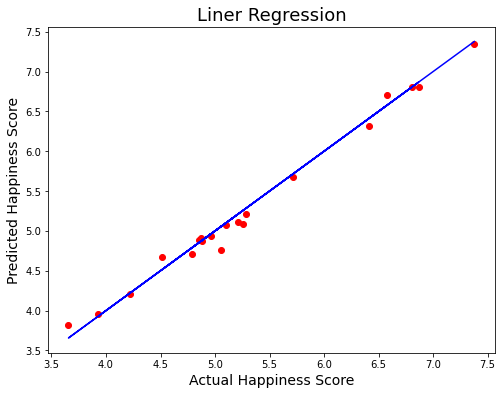

In [65]:
predlr=lr.predict(x_test)

plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predlr,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Liner Regression',fontsize=18)
plt.show()

We can see LinearRegression is working best

In [66]:
from sklearn.model_selection import cross_val_score
j=[lr,dt,kn,svr]
for n in j:
  print('Cross_Validation_score of',n,'is')
  score=cross_val_score(n,x,y,cv=8)
  print(score)
  print(score.mean())
  print(score.std())
  print('\n')

Cross_Validation_score of LinearRegression() is
[ 0.73815033  0.84920559  0.40383677  0.72507829 -0.08078479  0.65350133
  0.34024391  0.69904154]
0.5410341202861684
0.28528724722787135


Cross_Validation_score of DecisionTreeRegressor() is
[ -6.83393746  -9.71973261 -38.2650406  -14.68741288 -36.57721679
 -27.59778937 -26.96578253  -5.40100875]
-20.755990121542233
12.40199285217053


Cross_Validation_score of KNeighborsRegressor() is
[-8.32192886 -4.49815438 -4.92071101 -3.17260173 -9.68757148 -7.53843663
 -9.67908216 -9.01426183]
-7.104093509863118
2.3885181168108556


Cross_Validation_score of SVR() is
[-11.4761053   -0.58730341  -0.02648916   0.66527817  -0.39336035
  -0.15385552  -4.62673874  -4.72094859]
-2.664940363706436
3.865656939300647




# Lets save best model LinearRegression

In [67]:
import joblib
joblib.dump(lr,'Lr_Final_World_Happiness_Report.obj')

['Lr_Final_World_Happiness_Report.obj']